In [11]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML docume
import matplotlib.pyplot as plt
import gender_guesser.detector as gender

In [2]:
wikiurl="https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
Nobeltable=soup.find('table',{'class':"wikitable"})

In [99]:
df=pd.read_html(str(Nobeltable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.tail())


df = df[~df['Laureate[A]'].str.contains("XYZ") == True]

     Year Image                 Laureate[A]     Country[B]  \
223  2021   NaN  Klaus Hasselmann (b. 1931)        Germany   
224  2021   NaN    Giorgio Parisi (b. 1948)          Italy   
225  2022   NaN      Alain Aspect (b. 1947)         France   
226  2022   NaN      John Clauser (b. 1942)  United States   
227  2022   NaN   Anton Zeilinger (b. 1945)        Austria   

                                          Rationale[C]    Ref  
223  "for the physical modelling of Earth’s climate...  [126]  
224  "for the discovery of the interplay of disorde...  [126]  
225  "for experiments with entangled photons, estab...  [127]  
226  "for experiments with entangled photons, estab...  [127]  
227  "for experiments with entangled photons, estab...  [127]  


In [100]:
df.columns

Index(['Year', 'Image', 'Laureate[A]', 'Country[B]', 'Rationale[C]', 'Ref'], dtype='object')

In [101]:
unique, counts = np.unique(df['Country[B]'], return_counts=True)
print(np.asarray((unique, counts)).T)

[['Australia\xa0United Kingdom' 1]
 ['Australia\xa0United States' 1]
 ['Austria' 4]
 ['Austria-Hungary\xa0German Empire' 1]
 ['Belgium' 1]
 ['Canada' 4]
 ['Canada\xa0United States' 2]
 ['Denmark' 3]
 ['France' 13]
 ['France\xa0Poland' 1]
 ['German Empire' 5]
 ['German Empire\xa0United States' 2]
 ['Germany' 7]
 ['Germany\xa0United States' 1]
 ['Hong Kong\xa0United Kingdom\xa0United States' 1]
 ['Hungary\xa0United Kingdom' 1]
 ['Hungary\xa0United States' 1]
 ['India' 1]
 ['India\xa0United States' 1]
 ['Ireland' 1]
 ['Italy' 2]
 ['Italy\xa0United States' 2]
 ['Japan' 9]
 ['Japan\xa0United States' 2]
 ['Japan\xa0United States[125]' 1]
 ['Kingdom of Italy' 2]
 ['Netherlands' 8]
 ['Netherlands\xa0United States' 1]
 ['Not awarded' 2]
 ['Not awarded due to World War I' 1]
 ['Not awarded due to World War II' 3]
 ['Pakistan' 1]
 ['Poland\xa0France' 1]
 ['Republic of China' 2]
 ['Republic of China\xa0United States' 2]
 ['Russia' 2]
 ['Russia\xa0United Kingdom' 1]
 ['Russia\xa0United Kingdom\xa0N

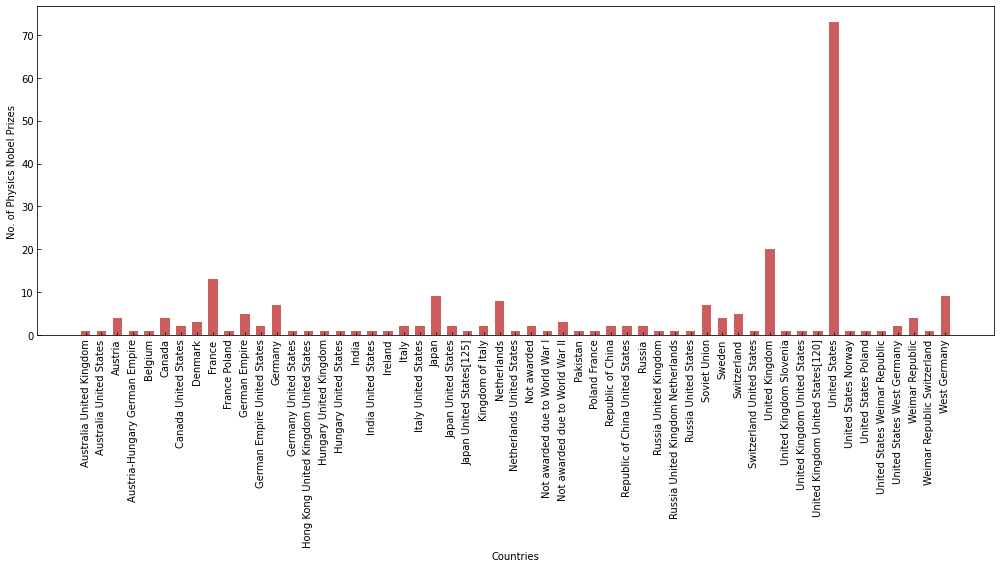

In [163]:
plt.bar(unique, counts, color ='indianred',
        width = 0.6)

plt.gca().tick_params(axis="y",direction="in")
plt.gca().tick_params(axis="x",direction="in")
plt.xlabel("Countries")
plt.ylabel("No. of Physics Nobel Prizes")
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(14, 8)
plt.tight_layout()
plt.savefig('Countrywise Physics Nobel.jpeg')
plt.show()

In [103]:
df[['LName', 'LYears']] = df['Laureate[A]'].str.split("(", n=2, expand=True)

In [104]:
df[['Lfirst', 'Llast','Llast2']]= df['LName'].str.split(" ", n=2, expand=True)

In [105]:
d = gender.Detector()

df['Gender'] = df['Lfirst'].apply(str.capitalize).map(lambda x: d.get_gender(x))

In [106]:
unique_gender, counts_gender = np.unique(df['Gender'], return_counts=True)
print(np.asarray((unique_gender, counts_gender)).T)

[['female' 5]
 ['male' 200]
 ['mostly_female' 1]
 ['mostly_male' 2]
 ['unknown' 20]]


In [124]:
for i in range(len(df['LName'])):
    print(df['LName'][i], "\t\t\t",df['Gender'][i], "\t\t\t\t",df['Country[B]'][i])

Wilhelm Röntgen  			 male 				 German Empire
Hendrik Lorentz  			 male 				 Netherlands
Pieter Zeeman  			 male 				 Netherlands
Antoine Henri Becquerel  			 male 				 France
Pierre Curie  			 male 				 France
Marie Skłodowska-Curie  			 female 				 Poland France
Lord Rayleigh  			 unknown 				 United Kingdom
Philipp Eduard Anton von Lenard  			 male 				 Austria-Hungary German Empire
Joseph John Thomson  			 male 				 United Kingdom
Albert Abraham Michelson  			 male 				 German Empire United States
Gabriel Lippmann  			 male 				 France
Guglielmo Marconi  			 male 				 Kingdom of Italy
Karl Ferdinand Braun  			 male 				 German Empire
Johannes Diderik van der Waals  			 male 				 Netherlands
Wilhelm Wien  			 male 				 German Empire
Nils Gustaf Dalén  			 male 				 Sweden
Heike Kamerlingh-Onnes  			 female 				 Netherlands
Max von Laue  			 male 				 German Empire
William Henry Bragg  			 male 				 United Kingdom
William Lawrence Bragg  			 male 				 Australia United Kingdom
Not awar

In [109]:
unique_gender, counts_gender

(array(['female', 'male', 'mostly_female', 'mostly_male', 'unknown'],
       dtype=object),
 array([  5, 200,   1,   2,  20]))

In [151]:
unique_gender_corr = ['White Men', 'White Women', 'Asian Men', 'Asian Women', 'Black Men', 'Black Women', 'Brown Men', 'Brown Women']
unique_counts_corr  = [199, 4, 18, 0, 0, 0, 4, 0]

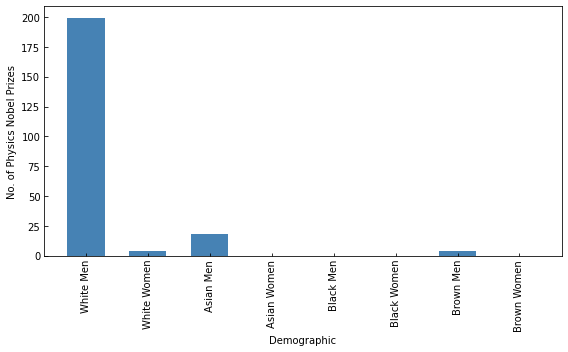

In [166]:
plt.bar(unique_gender_corr, unique_counts_corr, color ='steelblue',
        width = 0.6)

plt.gca().tick_params(axis="y",direction="in")
plt.gca().tick_params(axis="x",direction="in")
plt.xlabel("Demographic")
plt.ylabel("No. of Physics Nobel Prizes")
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(8, 5)
plt.tight_layout()
plt.savefig('Demographics Nobel 1901-2022.jpeg')
plt.show()